# Results - ENEGEP.

Os resultados serão utilizados para a publicação de um artigo no Encontro Nacional de Engenharia de Produção. 

## Libraries and DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import missingno as msno
import skopt
import locale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import matplotlib.ticker as mtick
#from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

dados= pd.read_csv(r"C:\Users\Matheus\Desktop\Mestrado\Projeto\machine-learning-anatel-database\raw_data\Anatel.csv")

linhas= dados.index
colunas= dados.columns

Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]
#Data_Filter = Data_Filter[ dados["OPERADORA"] == "VIVO"]


Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
#Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A2_1", inplace= True, axis = 1)
Data_Filter.drop("A2_2", inplace= True, axis = 1)
Data_Filter.drop("A2_3", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A3", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("IDTNS", inplace= True, axis = 1)
Data_Filter.drop("G1", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E2", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E8", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F4_1", inplace= True, axis = 1)
Data_Filter.drop("F4_2", inplace= True, axis = 1)
Data_Filter.drop("F4_3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)
Data_Filter.drop("I2", inplace= True, axis = 1)
Data_Filter.drop("TIPO", inplace= True, axis = 1)
Data_Filter.drop("DATA", inplace= True, axis = 1)
Data_Filter.drop("H0", inplace= True, axis = 1)





Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(2)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(2)
Data_Filter["A1_1"] = Data_Filter["A1_1"].fillna(2)



Data_Filter = Data_Filter[Data_Filter.J1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_3 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.H1 != 99]


Data_Filter.loc[Data_Filter.J1 >= 6, "J1"] = "SATISFEITO"
Data_Filter.loc[Data_Filter.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"

#Data_Filter["J1"] = Data_Filter["J1"].replace("SATISFEITO",1)
#Data_Filter["J1"] = Data_Filter["J1"].replace("INSATISFEITO",0)




def plot_dict_bar(dict):
    plt.bar(range(len(dict)), list(dict.values()), align='center')
    plt.xticks(range(len(dict)), list(dict.keys()), rotation=90)
    plt.show()

#Data_Filter.info()

Dados_Y = Data_Filter["J1"].copy()
Dados_X = Data_Filter.copy()
Dados_X.drop("J1", inplace= True, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Dados_X, Dados_Y, test_size=0.3,random_state=109) # 70% training and 30% tes

C:\Users\Matheus\AppData\Local\Temp\ipykernel_5348\3537278123.py:29: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  dados= pd.read_csv(r"C:\Users\Matheus\Desktop\Mestrado\Projeto\machine-learning-anatel-database\raw_data\Anatel.csv")


C:\Users\Matheus\AppData\Local\Temp\ipykernel_7988\1254125412.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, "5.000", "10.000", "15.000", "20.000", "25.000", "30.000"])


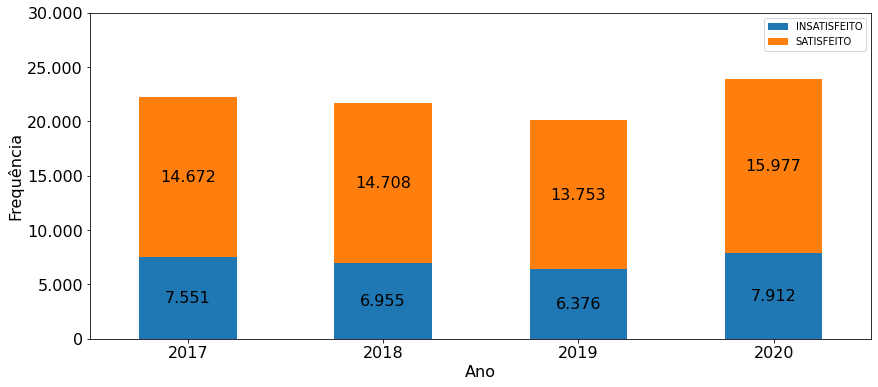

In [55]:
df2 = Data_Filter.groupby(['ANO_BASE', 'J1'])['J1'].count().unstack()

label_satis = list()
label_insatis = list()

for i in df2["SATISFEITO"].values:
    label_satis.append("{:,}".format(i).replace(",", "."))

for i in df2["INSATISFEITO"].values:
    label_insatis.append("{:,}".format(i).replace(",", "."))

ax = df2.plot(kind='bar', stacked=True)
ax.bar_label(ax.containers[0], labels = label_insatis, fontsize = 16, label_type = 'center')
ax.bar_label(ax.containers[1], labels = label_satis, fontsize = 16, label_type = 'center')
plt.gcf().set_size_inches(14, 6)
plt.xlabel("Ano", fontsize = 16)
ax.set_ylim([0,30000])
plt.xticks( rotation=0, fontsize = 16)
plt.yticks (fontsize = 16)
ax.set_yticklabels([0, "5.000", "10.000", "15.000", "20.000", "25.000", "30.000"])
plt.ylabel("Frequência", fontsize = 16)
plt.legend(loc='upper right')
plt.show()

In [47]:
print(df2["SATISFEITO"].values)

[14672 14708 13753 15977]


C:\Users\Matheus\AppData\Local\Temp\ipykernel_6004\2408114745.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  valores.sort_index(0, inplace = True)


<function matplotlib.pyplot.show(close=None, block=None)>

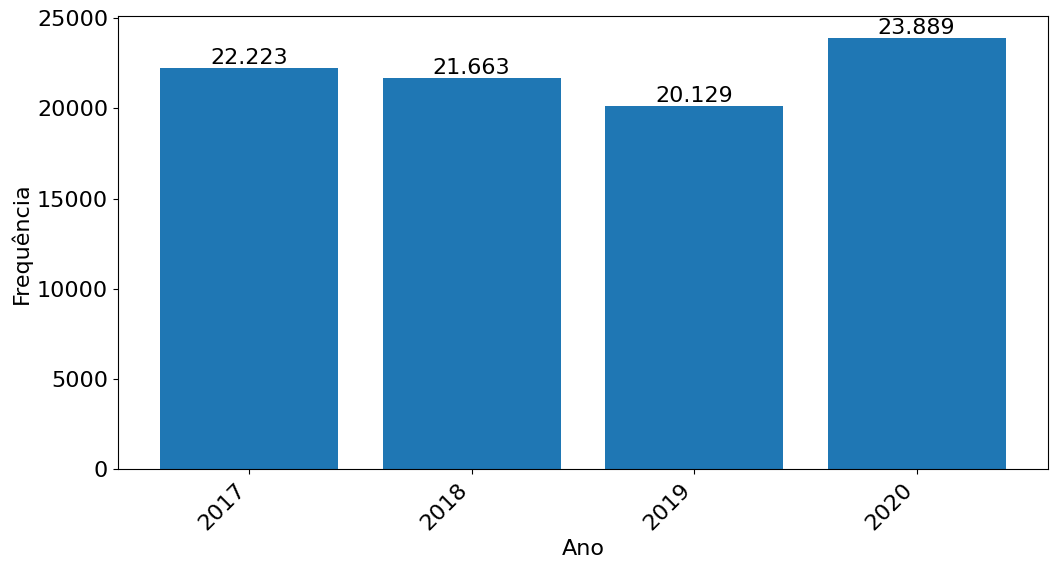

In [26]:
valores = Data_Filter["ANO_BASE"].value_counts()
valores.sort_index(0, inplace = True)

#valores.sort_values(by = "OPERADORA", ascending=False)

x = valores.index.values
y = valores.values
y2 = list()
for i in y:
    y2.append("{:,}".format(i).replace(",", "."))


fig, ax = plt.subplots()
bars = ax.bar(x, y)
plt.gcf().set_size_inches(12, 6)
Teste = ax.bar_label(bars, fontsize = 16, labels = y2 )
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Ano", fontsize = 16)
plt.xticks([2017, 2018, 2019, 2020], rotation=45, horizontalalignment='right', fontsize = 16)
plt.yticks (fontsize = 16)
plt.ylabel("Frequência", fontsize = 16)

plt.show

C:\Users\Matheus\AppData\Local\Temp\ipykernel_5348\1590058142.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, "5.000", "10.000", "15.000", "20.000", "25.000", "30.000"])


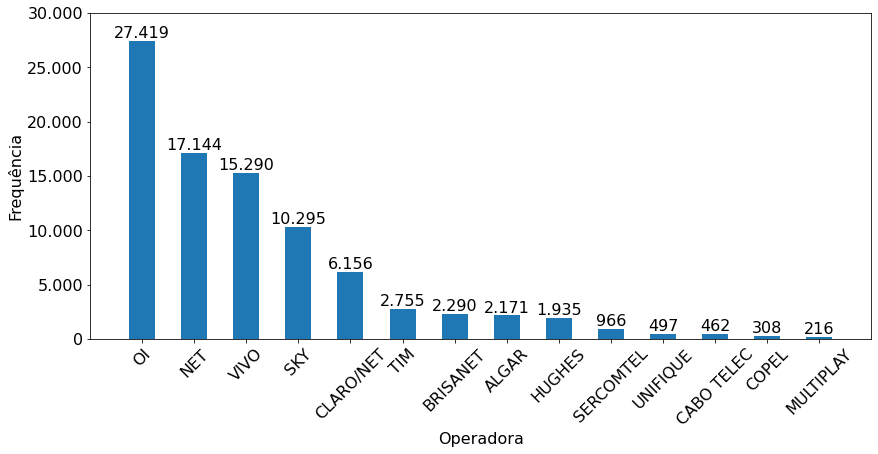

In [3]:

y2 = list()
for i in Data_Filter.value_counts("OPERADORA"):
    y2.append("{:,}".format(i).replace(",", "."))


ax = Data_Filter.value_counts("OPERADORA").plot.bar()
#ax.set_xlim([-1,9.5])
ax.bar_label(ax.containers[0],labels = y2 , fontsize = 16)
plt.gcf().set_size_inches(14, 6)
plt.xlabel("Operadora", fontsize = 16)
ax.set_ylim([0,30000])
ax.set_xlim([-1, 14])
plt.xticks( rotation=45, fontsize = 16)
plt.yticks (fontsize = 16)
ax.set_yticklabels([0, "5.000", "10.000", "15.000", "20.000", "25.000", "30.000"])
plt.ylabel("Frequência", fontsize = 16)
plt.show()

In [34]:
def plot_roc_curve(fpr, tpr, legenda):
    plt.rcParams['axes.formatter.use_locale'] = True
    plt.plot(fpr, tpr, linewidth = 2, label = legenda)
    plt.gcf().set_size_inches(12, 6)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.rcParams["figure.dpi"] = 100
    plt.legend()
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    
    #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

def plot_box_plot(dataframe):
    dataframe.boxplot(column=['KNN', 'RF', 'LR', 'DT'], showfliers=False)
    plt.ylabel("Acurácia")
    plt.xlabel("Técnicas")
    plt.gcf().set_size_inches(12, 6)
    plt.rcParams["figure.dpi"] = 100


def plot_box_plot_opt(dataframe):
    dataframe.boxplot(column=['KNN_Opt', 'RF_Opt', 'LR_Opt', 'DT_Opt'], showfliers=False)
    plt.ylabel("Acurácia")
    plt.xlabel("Técnicas")
    plt.gcf().set_size_inches(12, 6)
    plt.rcParams["figure.dpi"] = 100


def plot_box_plot_full(dataframe):
    dataframe.boxplot(column=['KNN_Opt', 'KNN', 'RF_Opt', 'RF' , 'LR_Opt', 'LR' ,'DT_Opt', 'DT'], showfliers=False)
    plt.ylabel("Acurácia")
    plt.xlabel("Técnicas")
    plt.gcf().set_size_inches(12, 6)
    plt.rcParams["figure.dpi"] = 100

In [5]:
Rand_Forest_Class = RandomForestClassifier()
Knn_Class = KNeighborsClassifier()
logisticRegr = LogisticRegression()
Decision_Tree = tree.DecisionTreeClassifier()
SVM_Class = SVC(kernel='linear', probability=True) # rbf  Kernel

In [4]:
classifiers = dict()

classifiers = {"RF": Rand_Forest_Class, "KNN": Knn_Class, "LR": logisticRegr, "DT": Decision_Tree}


,ML,Acc,Precision,Recall,F1,AUC-Score
1,RF,0.882261,0.907502,0.9187,0.913067,0.943956
2,KNN,0.851964,0.861923,0.928841,0.894132,0.893673
3,LR,0.870127,0.88493,0.927658,0.90579,0.932706
4,DT,0.822084,0.866337,0.869852,0.868091,0.796807


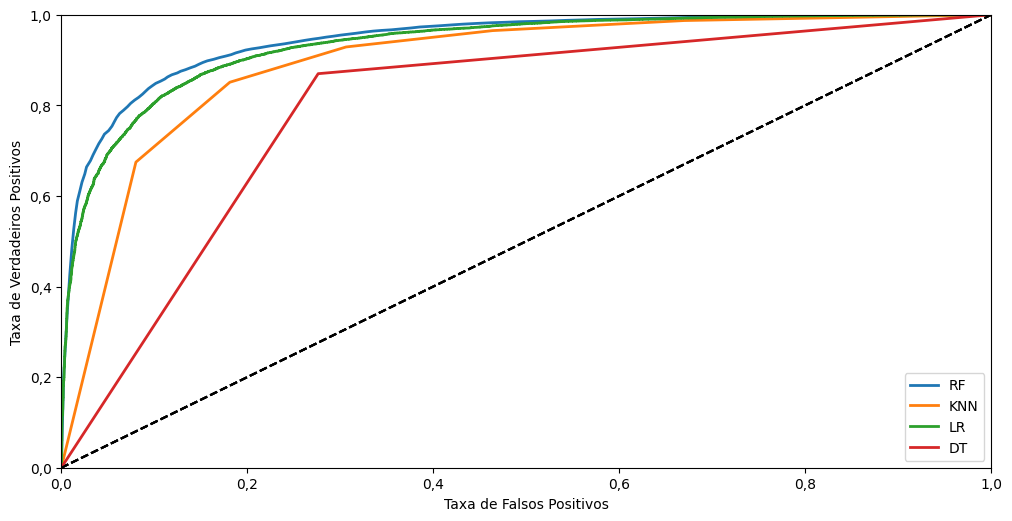

In [46]:
desempenho_ml = pd.DataFrame(columns=['ML','Acc','Precision','Recall', 'F1', 'AUC-Score'])

debug = 0

for number, i in enumerate(classifiers):
    classifiers[i].fit(X_train, y_train)
    y_pred = classifiers[i].predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    y_pred_prob = classifiers[i].predict_proba(X_test)
    y_pred_prob = y_pred_prob[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    pr = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    F1 = f1_score(y_test, y_pred)
    fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)
    plot_roc_curve(fpr,tpr,  i)
    auc = roc_auc_score(y_test,y_pred_prob)
    desempenho_ml.loc[number +1] = pd.Series({'ML': i, 'Acc': acc, 'Precision': pr, 'Recall': rec, 'F1': F1, 'AUC-Score': auc}) 
    if debug == 1:
        print(i)
        print("\n")
        print("Tamanho FPR:", len(fpr))
        print("Tamanho TPR:", len(tpr))
        print("\n")
        if i == "KNN":
            knn_prob = y_pred_prob
        if i == "LR":
            lr_prob =  y_pred_prob
        if i == "DT":
            dt_prob = y_pred_prob
        if i == "RF":
            rf_prob = y_pred_prob
        
desempenho_ml.head()


## SVM

### Default


Accuracy: 0.7980812983467314
Precisão: 0.8022576878162709
Recall: 0.9289537438728942
F1Score: 0.8609696874755228
AUC Score: 0.7287402993801482


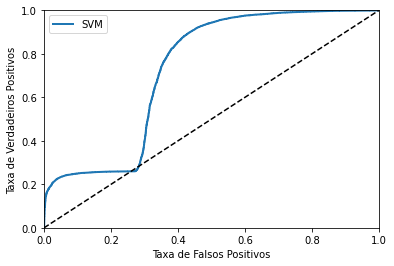

In [7]:
SVM_Class.fit(X_train, y_train)
y_pred = SVM_Class.predict(X_test)
y_pred_prob = SVM_Class.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)

fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "SVM")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
print("AUC Score:",aucKNN)

# Optimize Params

In [6]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer



## Random Forest

In [5]:
search_space = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False
        "max_depth": Integer(6, 24, 'uniform'), # values of max_depth are integers from 6 to 20
        "min_samples_leaf": Integer(2, 4,'uniform'),
        "min_samples_split": Integer(2, 4, 'uniform'),
        "n_estimators": Integer(200, 400, 'uniform')
    }

forest_clf = RandomForestClassifier()

forest_bayes_search = BayesSearchCV(forest_clf, search_space, n_iter=10, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

forest_bayes_search.fit(X_train, y_train) 

forest_bayes_search.best_score_

forest_bayes_search.best_estimator_



RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=293)

In [6]:
Rand_Forest_Class_Opt = RandomForestClassifier()
Rand_Forest_Class_Opt.set_params(**forest_bayes_search.best_params_)
print(forest_bayes_search.best_params_)

OrderedDict([('bootstrap', True), ('max_depth', 13), ('min_samples_leaf', 3), ('min_samples_split', 4), ('n_estimators', 293)])


In [7]:
Rand_Forest_Class_Opt.fit(X_train, y_train)
y_pred = Rand_Forest_Class_Opt.predict(X_test)
y_pred_prob = Rand_Forest_Class_Opt.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
Rand_Forest_Class_Opt.feature_importances_
#print("Precisão:", pKNN)
#print("Recall:", rKNN)
#print("F1Score:", F1KNN)
#fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
#plot_roc_curve(fprKNN,tprKNN,  "Random Forest Otimizado")

#aucKNN = roc_auc_score(y_test,y_pred_prob)

#print("AUC Score:",aucKNN)

Accuracy: 0.8823752464735325


array([0.01059075, 0.01673964, 0.00744459, 0.00259585, 0.02012899,
       0.00375648, 0.0965877 , 0.19471628, 0.16002297, 0.12662999,
       0.21865024, 0.04819651, 0.03322438, 0.00261792, 0.00363707,
       0.00201834, 0.00440228, 0.00365283, 0.00442262, 0.00730932,
       0.00232367, 0.00680965, 0.0067306 , 0.01679132])

C:\Users\Matheus\AppData\Local\Temp\ipykernel_10788\2184197957.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


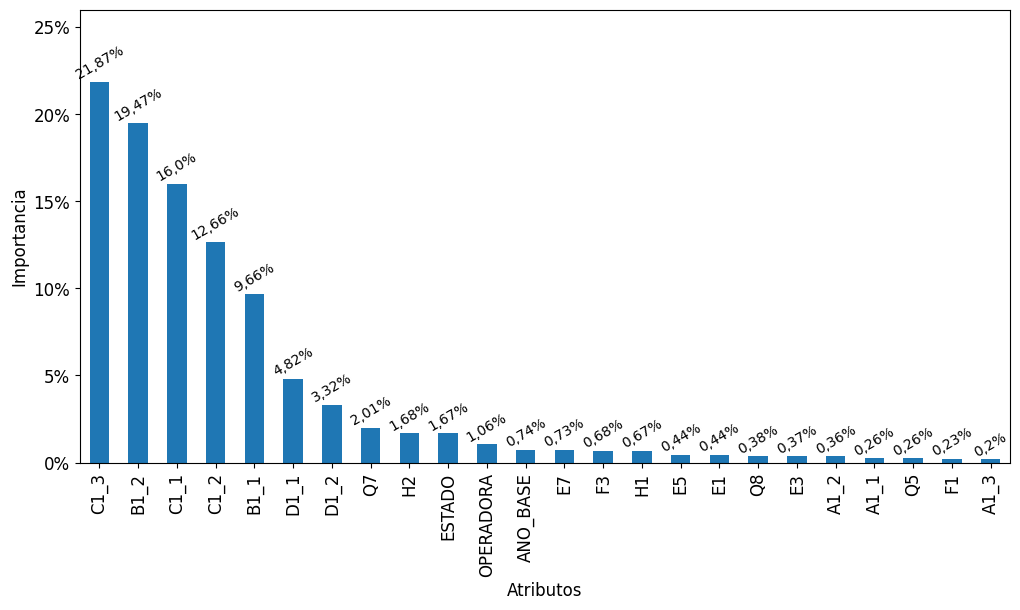

In [44]:
importances  = Rand_Forest_Class_Opt.feature_importances_
forest_importances = pd.Series(importances, index=X_test.columns)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

labels = list()
for i in forest_importances_sorted:
    i_str = str(round(i*100,2)) + "%"
    i_str = i_str.replace(".", ",")
    labels.append(i_str)


fig, ax = plt.subplots()
forest_importances_sorted.plot.bar()
ax.bar_label(ax.containers[0], labels=labels, rotation = 30)
plt.rcParams['axes.formatter.use_locale'] = True
ax.set_ylabel("Importancia", fontsize = 12)
ax.set_xlabel("Atributos", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 0.26])
plt.rcParams["figure.dpi"] = 100
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.gcf().set_size_inches(12, 6)

## Logistic Regression

In [15]:
search_space = {"penalty":  Categorical(['l2', 'none']), # values of max_depth are integers from 6 to 20
        "tol": Real(1e-6, 1e-2, 'uniform'),
        "fit_intercept": Categorical([True, False]),
        "max_iter": Integer(100,500, 'uniform')
    }

logistic_clf = LogisticRegression()

logistic_clf_search = BayesSearchCV(logistic_clf, search_space, n_iter=10, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

logistic_clf_search.fit(X_train, y_train) 

logistic_clf_search.best_score_

logistic_clf_search.best_estimator_

print(logistic_clf_search.best_params_)

OrderedDict([('fit_intercept', True), ('max_iter', 378), ('penalty', 'none'), ('tol', 0.00848489216597723)])


In [16]:
logistic_Class_Opt = LogisticRegression(fit_intercept= True, max_iter= 378, penalty= 'none', tol= 0.00848489216597723)

Accuracy: 0.8701274078568179
Precisão: 0.8849295926045362
Recall: 0.9276578962195053
F1Score: 0.9057901251547242
AUC Score: 0.9327057948334627


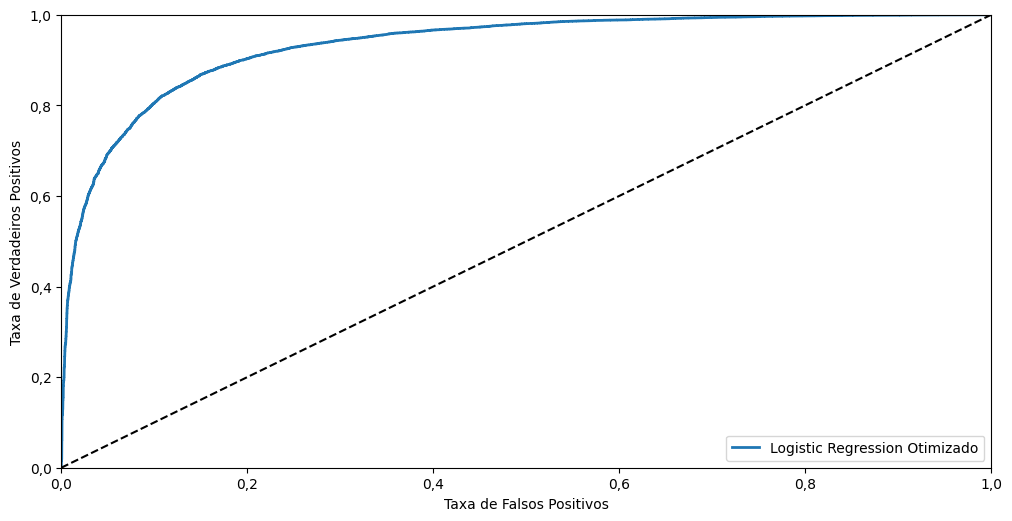

In [17]:
logistic_Class_Opt.fit(X_train, y_train)
y_pred = logistic_Class_Opt.predict(X_test)
y_pred_prob = logistic_Class_Opt.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "Logistic Regression Otimizado")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

## KNN

In [18]:
search_space = {"n_neighbors":  Integer(1, 10, 'uniform'), # values of max_depth are integers from 6 to 20
        "weights": Categorical(['uniform', 'distance'])
    }

knn_clf = KNeighborsClassifier()

knn_clf_search = BayesSearchCV(knn_clf, search_space, n_iter=10, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

knn_clf_search.fit(X_train, y_train) 

knn_clf_search.best_score_

knn_clf_search.best_estimator_

print(knn_clf_search.best_params_)

OrderedDict([('n_neighbors', 10), ('weights', 'distance')])


In [19]:
knn_clf_opt = KNeighborsClassifier()
knn_clf_opt.set_params(**knn_clf_search.best_params_)

KNeighborsClassifier(n_neighbors=10, weights='distance')

Accuracy: 0.8553769149097528
Precisão: 0.8691390728476821
Recall: 0.9242774240802298
F1Score: 0.8958606378331149
AUC Score: 0.911220829045209


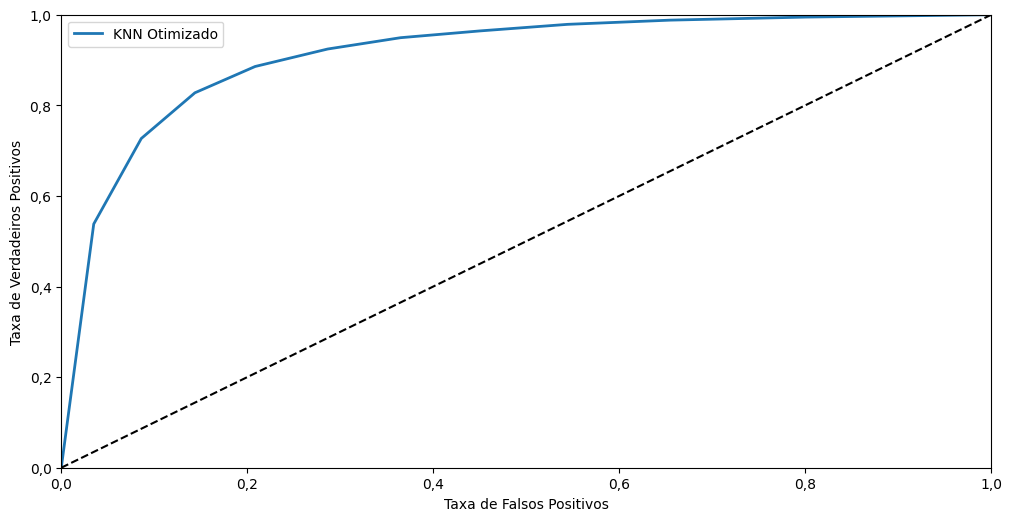

In [20]:
knn_clf_search.fit(X_train, y_train)
y_pred = knn_clf_search.predict(X_test)
y_pred_prob = knn_clf_search.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
print("Precisão:", pKNN)
print("Recall:", rKNN)
print("F1Score:", F1KNN)
fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fprKNN,tprKNN,  "KNN Otimizado")

aucKNN = roc_auc_score(y_test,y_pred_prob)

print("AUC Score:",aucKNN)

## Decision Tree

In [7]:
search_space = {"criterion": Categorical(["gini", "entropy"]), # values for boostrap can be either True or False
        "splitter": Categorical(["best", "random"]),
        "max_depth": Integer(6, 24, 'uniform'), # values of max_depth are integers from 6 to 20
        "min_samples_leaf": Integer(2, 4,'uniform'),
        "min_samples_split": Integer(2, 4, 'uniform'),
    }


dt_clf = tree.DecisionTreeClassifier()

dt_clf_search = BayesSearchCV(dt_clf, search_space, n_iter=10, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

dt_clf_search.fit(X_train, y_train) 

dt_clf_search.best_score_

dt_clf_search.best_estimator_

dt_clf_opt = tree.DecisionTreeClassifier()
dt_clf_opt.set_params(**dt_clf_search.best_params_)
print(dt_clf_search.best_params_)


OrderedDict([('criterion', 'gini'), ('max_depth', 7), ('min_samples_leaf', 2), ('min_samples_split', 4), ('splitter', 'best')])


In [8]:
dt_clf_opt.fit(X_train, y_train)
y_pred = dt_clf_opt.predict(X_test)
y_pred_prob = dt_clf_opt.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmKNN = confusion_matrix(y_test, y_pred)

pKNN = precision_score(y_test,y_pred)
rKNN = recall_score(y_test,y_pred)
F1KNN = f1_score(y_test, y_pred)
#print("Precisão:", pKNN)
#print("Recall:", rKNN)
#print("F1Score:", F1KNN)
#fprKNN, tprKNN, threshold_KNN = roc_curve(y_test,y_pred_prob)
#plot_roc_curve(fprKNN,tprKNN,  "DT Otimizado")

#aucKNN = roc_auc_score(y_test,y_pred_prob)

#print("AUC Score:",aucKNN)

Accuracy: 0.879720916123161


C:\Users\Matheus\AppData\Local\Temp\ipykernel_10788\3312570371.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


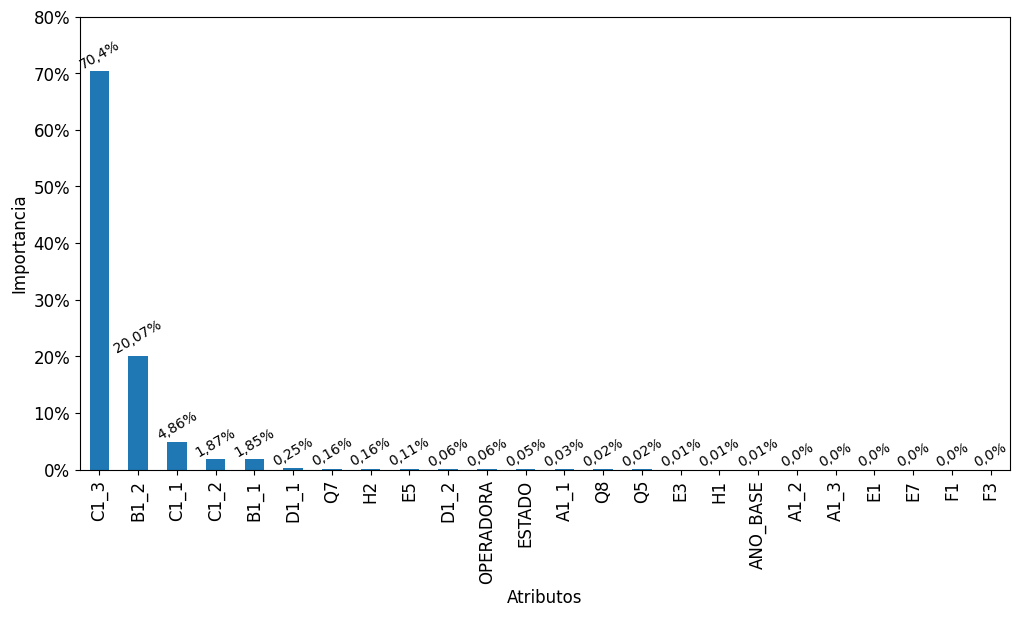

In [54]:
importances  = dt_clf_opt.feature_importances_
dt_importances = pd.Series(importances, index=X_test.columns)
dt_importances_sorted = dt_importances.sort_values(ascending=False)

labels = list()
for i in forest_importances_sorted:
    i_str = str(round(i*100,2)) + "%"
    i_str = i_str.replace(".", ",")
    labels.append(i_str)


fig, ax = plt.subplots()
forest_importances_sorted.plot.bar()
ax.bar_label(ax.containers[0], labels=labels, rotation = 30)
plt.rcParams['axes.formatter.use_locale'] = True
ax.set_ylabel("Importancia", fontsize = 12)
ax.set_xlabel("Atributos", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 0.80])
plt.rcParams["figure.dpi"] = 100
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.gcf().set_size_inches(12, 6)

,ML,Acc,Precision,Recall,F1,AUC-Score
1,RF_Opt,0.882186,0.904475,0.922362,0.913331,0.946184
2,KNN_Opt,0.851547,0.856841,0.935771,0.894568,0.912493
3,LR_Opt,0.870127,0.88493,0.927658,0.90579,0.932706
4,DT_Opt,0.879228,0.907909,0.913178,0.910536,0.938156


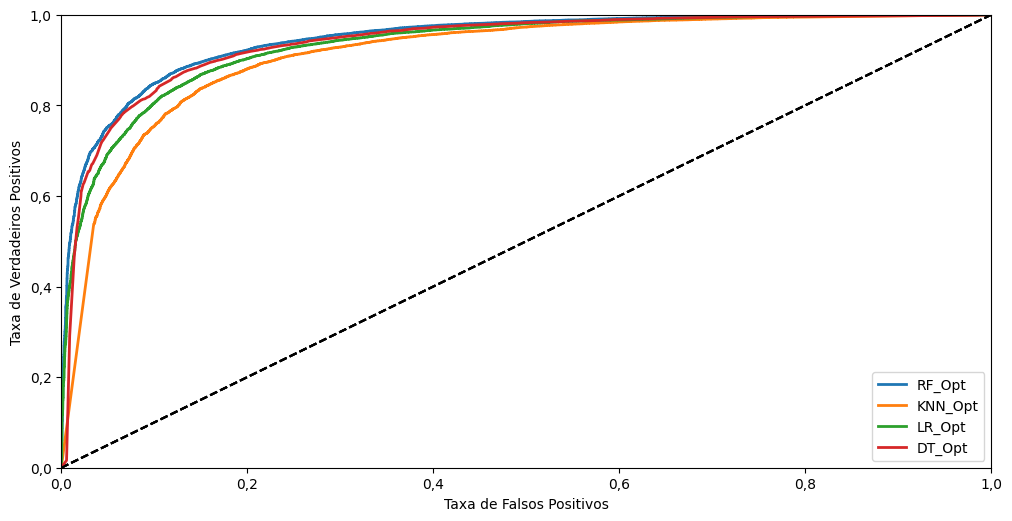

In [22]:
classifiers_opt = {"RF_Opt": Rand_Forest_Class_Opt, "KNN_Opt": knn_clf_opt, "LR_Opt": logistic_Class_Opt, "DT_Opt": dt_clf_opt}
desempenho_ml_opt = pd.DataFrame(columns=['ML','Acc','Precision','Recall', 'F1', 'AUC-Score'])

debug = 0

for number, i in enumerate(classifiers_opt):
    classifiers_opt[i].fit(X_train, y_train)
    y_pred = classifiers_opt[i].predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    y_pred_prob = classifiers_opt[i].predict_proba(X_test)
    y_pred_prob = y_pred_prob[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    pr = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    F1 = f1_score(y_test, y_pred)
    string = i + " Otimizado"
    fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)
    plot_roc_curve(fpr,tpr,  i)
    auc = roc_auc_score(y_test,y_pred_prob)
    desempenho_ml_opt.loc[number +1] = pd.Series({'ML': i, 'Acc': acc, 'Precision': pr, 'Recall': rec, 'F1': F1, 'AUC-Score': auc}) 
    if debug == 1:
        print(i)
        print("\n")
        print("Tamanho FPR:", len(fpr))
        print("Tamanho TPR:", len(tpr))
        print("\n")
        if i == "KNN":
            knn_prob = y_pred_prob
        if i == "LR":
            lr_prob =  y_pred_prob
        if i == "DT":
            dt_prob = y_pred_prob
        if i == "RF":
            rf_prob = y_pred_prob
        
desempenho_ml_opt.head()

# Cross Validation

### Pré Otimização

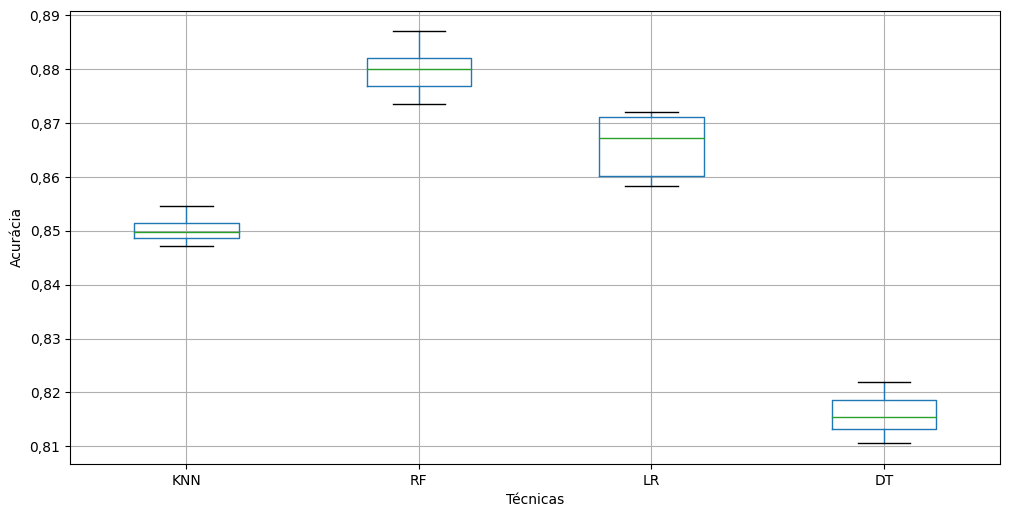

In [29]:
cv_dataframe = pd.DataFrame()
desempenho_cross_val = pd.DataFrame(columns=['ML','Media','Variancia','Desvio'])

for number, i in enumerate(classifiers):
    scores = cross_val_score(classifiers[i], Dados_X, Dados_Y, cv=10, scoring = 'accuracy')
    desempenho_cross_val.loc[number +1] = pd.Series({'ML': i, 'Media':  scores.mean(), 'Variancia': scores.var() , 'Desvio': scores.std()}) 
    cv_dataframe[i] = scores.tolist()
desempenho_cross_val.head()
plot_box_plot(cv_dataframe)


### Pós Otimização

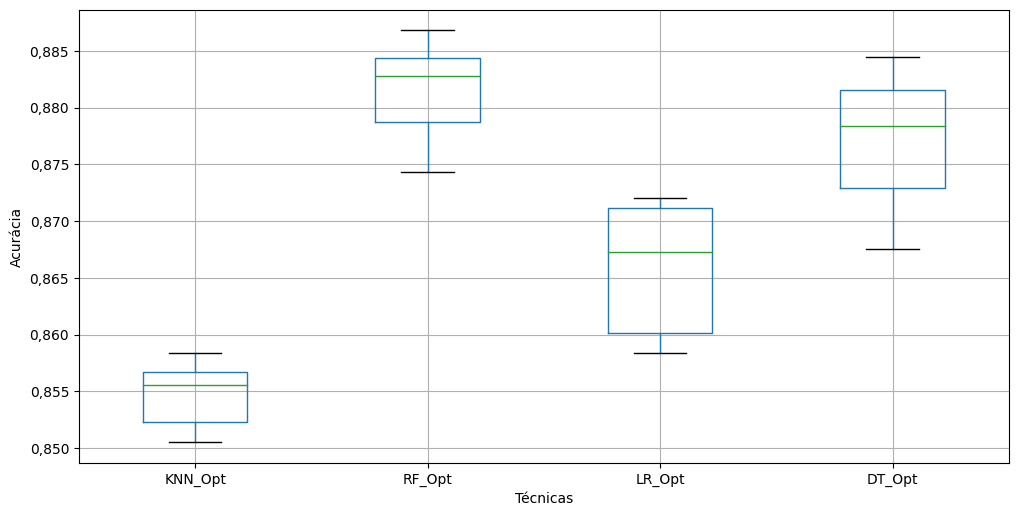

In [27]:
cv_dataframe_opt = pd.DataFrame()
desempenho_cross_val_opt = pd.DataFrame(columns=['ML','Media','Variancia','Desvio'])

for number, i in enumerate(classifiers_opt):
    scores = cross_val_score(classifiers_opt[i], Dados_X, Dados_Y, cv=10, scoring = 'accuracy')
    desempenho_cross_val_opt.loc[number +1] = pd.Series({'ML': i, 'Media':  scores.mean(), 'Variancia': scores.var() , 'Desvio': scores.std()}) 
    cv_dataframe_opt[i] = scores.tolist()

desempenho_cross_val_opt.head()
plot_box_plot_opt(cv_dataframe_opt)

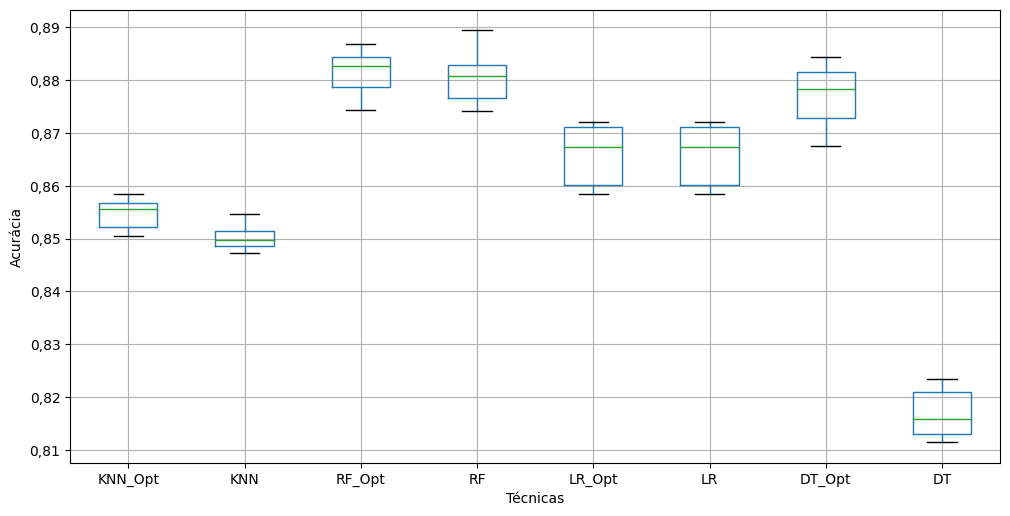

In [28]:
result = pd.concat([cv_dataframe_opt, cv_dataframe], axis=1)

plot_box_plot_full(result)


In [96]:
print("Antes da Otimização \n")
print(desempenho_ml)
print("Pós Otimização \n")
print(desempenho_ml_opt)

Antes da Otimização 

    ML       Acc Precision    Recall        F1 AUC-Score
1   RF  0.882261  0.907502    0.9187  0.913067  0.943956
2  KNN  0.851964  0.861923  0.928841  0.894132  0.893673
3   LR  0.870127   0.88493  0.927658   0.90579  0.932706
4   DT  0.822084  0.866337  0.869852  0.868091  0.796807
Pós Otimização 

    ML       Acc Precision    Recall        F1 AUC-Score
1   RF  0.883285  0.906016  0.922249  0.914061  0.946428
2  KNN  0.850978  0.856399  0.935433  0.894173  0.909569
3   LR  0.870127   0.88493  0.927658   0.90579  0.932706
4   DT  0.878697  0.908984  0.910981  0.909981  0.941978


# Free Notes

Sim - 1

Não - 2

Satisfeito - 1

Insatisfeito - 0


Obs: SVM demorou 5m para rodar 

Obs: SVM com curva ROC demorou 87min para rodar =/

Obs: Cross Validation do modelo otimizado demorou 237min

## Optimizer
Tempo de Otimização - Random Forest 9min

> Deve ser alocado a distribuição dos parâmetros no SearchSpace - foi usado Uniforme. 

## KNN

- Método do tipo Não Paramétrico, possui poucos parâmetros para serem ajustados;
- Calcula a distância dos vizinhos mais próximos da classe de treinamento
- Ajustar o k e Peso para otimizar


## ROC AUC Decision Tree

https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier

## DEBUG

RF


[[ 6963  1660]
 [ 1438 16311]]


Tamanho Vetor para plot ROC: 26372


KNN


[[ 5982  2641]
 [ 1263 16486]]


Tamanho Vetor para plot ROC: 26372


LR


[[ 6482  2141]
 [ 1284 16465]]


Tamanho Vetor para plot ROC: 26372


DT


[[ 6235  2388]
 [ 2341 15408]]


Tamanho Vetor para plot ROC: 26372

Vetores de Probabilidades das tecnicas

In [45]:
print("KNN")
print(knn_prob)
print("LR")
print(lr_prob)
print("RF")
print(rf_prob)
print("DT")
print(dt_prob)


KNN
[0.  0.  0.6 ... 1.  0.2 0.8]
LR
[0.00735988 0.03425915 0.8326243  ... 0.93943598 0.04209773 0.61817112]
RF
[0.12 0.02 0.73 ... 1.   0.07 0.41]
DT
[0. 0. 1. ... 1. 0. 0.]
